In [41]:
import numpy as np

In [42]:
x = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [43]:
x

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [44]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(x)
Y = scaler_y.fit_transform(y)

C:\Users\vitor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vitor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vitor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vitor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


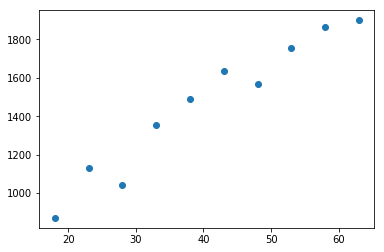

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

# Formula regressão linear simples

y = b0 + b1 * x 

In [47]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [48]:
import tensorflow as tf

In [49]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [50]:
erro = tf.losses.mean_squared_error(Y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(b0))
    print(sess.run(b1))
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])

0.54
0.71


In [52]:
b0_final

0.07293497

In [53]:
b1_final

0.9359134

In [54]:
previsoes = b0_final + b1_final * X
previsoes

array([[-1.3933595 ],
       [-1.06751629],
       [-0.74167307],
       [-0.41582985],
       [-0.08998664],
       [ 0.23585658],
       [ 0.56169979],
       [ 0.88754301],
       [ 1.21338623],
       [ 1.53922944]])

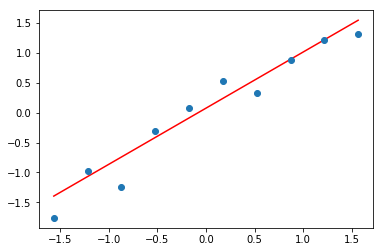

In [55]:
plt.plot(X, previsoes, color='red')
plt.plot(X, Y, 'o')

In [60]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[1475.15950152]])

In [62]:
y1 = scaler_y.inverse_transform(Y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [66]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 993.37307127],
       [1102.86998723],
       [1212.3669032 ],
       [1321.86381917],
       [1431.36073513],
       [1540.8576511 ],
       [1650.35456707],
       [1759.85148303],
       [1869.348399  ],
       [1978.84531497]])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)
mae

67.91875458994167

In [70]:
mse

7153.9129941765395